RANDOM FOREST

Birden fazla karar ağacının ürettiği tahminlerin biraraya getirilerek değerlendirilmesine dayanır.

Ağaç oluşturmada verisetinin 2/3'ü kullanılır. Dışarıda kalan veri, ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.

Random Forest, genellikle yüksek boyutlu ve karmaşık veri setlerinde iyi performans gösterir. Ayrıca, aşırı uydurmayı (overfitting) azaltmak için etkili bir yöntemdir.

In [1]:
# "diabetes" verisetini yüklüyoruz.
import pandas as pd
import numpy as np
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df.head()

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Veriseti içindeki eksik verileri siliyoruz.
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Verisetini tanımak için incelemeler yapıyoruz.

In [4]:
# Verisetindeki sayısal sütunlar için istatistiksel özet bilgilerini inceliyoruz.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
# Veriseti içinde eksik değer kalıp kalmadığını inceliyoruz.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Verisetindeki bağımlı ve bağımsız değişkenleri belirliyoruz.
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Modeli oluşturduk ve eğittik.
model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)

In [11]:
# Model üzerinde tahmin işlemini gerçekleştirdik.
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
# Test Seti için "accuracy_score" değerini hesapladık.
accuracy_score_test = accuracy_score(y_test, y_test_pred)
print('Test Seti Doğruluk Oranı:', accuracy_score_test)

Test Seti Doğruluk Oranı: 0.7662337662337663


Model Tuning

In [14]:
# Cross Validation (Çapraz Doğrulama) işlemini gerçekleştirmek için nesne oluşturuyoruz.
from sklearn.model_selection import GridSearchCV
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [15]:
# Cross Validation nesnesi oluşturduktan sonra modeli oluşturduk ve eğittik.
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2)
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [16]:
# Model için en iyi parametreler aşağıdaki gibidir.
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [17]:
# Final Modelini kuruyoruz.
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 2,
                                  n_estimators = 1000)
rf_tuned = rf_tuned.fit(X_train, y_train)

In [18]:
# Final modeli üzerinde tahmin işlemini gerçekleştirdik.
y_pred_test = rf_tuned.predict(X_test)

In [19]:
# Model tuning işleminden sonra "accuracy_score" değerini tekrar hesapladık.
accuracy_score_test = accuracy_score(y_test, y_pred_test)
print('Test Seti Doğruluk Oranı:', accuracy_score_test)

Test Seti Doğruluk Oranı: 0.7402597402597403


Text(0.5, 0, 'Değişken Önem Düzeyleri')

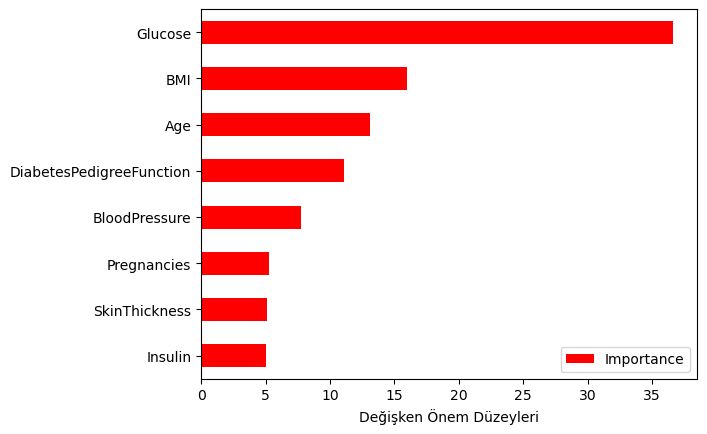

In [20]:
# Değişkenlerin önem düzeyini gösteriyoruz.
import matplotlib.pyplot as plt

Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

Özelliklerin önem sıralaması ne kadar yüksekse, model için o kadar önemli oldukları anlamına gelir. 